# Sectors_plot

---


In [8]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# get the API and finace yahoo finance
import yfinance as yf



In [9]:
# get s&p100 sector data of different years
# pie plot every 10 years
# sectors number changes via years

In [10]:
#import the csv and find the 
sp500_df = pd.read_csv('../resources/s&p500.csv')
sp500_df = sp500_df.dropna()
sp500_df

,Name,Ticker,Identifier,SEDOL,Weight,Sector,Shares Held,Local Currency
0,Apple Inc.,AAPL,3783310,2046251,7.110275,Information Technology,163874670.0,USD
1,Microsoft Corporation,MSFT,59491810,2588173,6.065087,Information Technology,82019920.0,USD
2,Amazon.com Inc.,AMZN,2313510,2000019,2.738040,Consumer Discretionary,98231640.0,USD
3,NVIDIA Corporation,NVDA,67066G10,2379504,1.923625,Information Technology,27105582.0,USD
4,Alphabet Inc. Class A,GOOGL,02079K30,BYVY8G0,1.825088,Communication Services,65626300.0,USD
...,...,...,...,...,...,...,...,...
499,Fox Corporation Class B,FOX,35137L20,BJJMGY5,0.012028,Communication Services,1532395.0,USD
500,Lincoln National Corp,LNC,53418710,2516378,0.009445,Financials,1698362.0,USD
501,First Republic Bank,FRC,33616C10,B4WHY15,0.008411,Financials,2003120.0,USD
502,News Corporation Class B,NWS,65249B20,BBGVT51,0.006133,Communication Services,1341504.0,USD


In [11]:
unassigned_row = sp500_df.loc[sp500_df["Sector"]=="Unassigned",:]
unassigned_row

,Name,Ticker,Identifier,SEDOL,Weight,Sector,Shares Held,Local Currency
469,U.S. Dollar,CASH_USD,CASH_USD,Unassigned,0.024899,Unassigned,94877580.0,USD


In [12]:
sp500_df = sp500_df.drop(469, axis=0)

In [13]:
# count each sector number at 2023
sector_group = sp500_df.groupby(["Sector"])
count = sector_group["Name"].count()
sector_df = pd.DataFrame(count)
sector_df = sector_df.reset_index()
sector_df

,Sector,Name
0,Communication Services,24
1,Consumer Discretionary,53
2,Consumer Staples,37
3,Energy,23
4,Financials,73
5,Health Care,65
6,Industrials,73
7,Information Technology,66
8,Materials,29
9,Real Estate,30


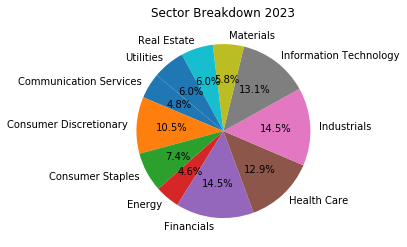

In [14]:
# Labels for the sections of our pie chart
labels = sector_df["Sector"]
# The values of each section of the pie chart
sizes = sector_df["Name"]
#Creates the pie chart based upon the values above
plt.pie(sizes, labels=labels, autopct="%1.1f%%", startangle=140)
plt.title('Sector Breakdown 2023')
plt.show()

In [15]:
# calculate each sector weight at 2023
sector_group = sp500_df.groupby(["Sector"])
sector_weighted = sector_group["Weight"].sum()
sector_weighted_df = pd.DataFrame(sector_weighted)
sector_weighted_df = sector_weighted_df.reset_index()
sector_weighted_df

,Sector,Weight
0,Communication Services,8.039725
1,Consumer Discretionary,9.940755
2,Consumer Staples,7.382551
3,Energy,4.778674
4,Financials,13.201055
5,Health Care,14.684849
6,Industrials,8.570879
7,Information Technology,25.285475
8,Materials,2.640948
9,Real Estate,2.513488


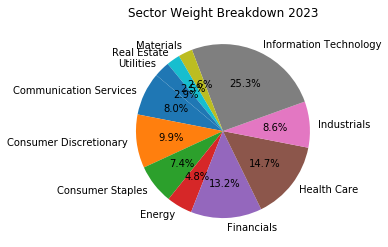

In [16]:
# Labels for the sections of our pie chart
labels = sector_weighted_df["Sector"]
# The values of each section of the pie chart
sizes = sector_weighted_df["Weight"]
#Creates the pie chart based upon the values above
plt.pie(sizes, labels=labels ,autopct="%1.1f%%", startangle=140)
plt.title('Sector Weight Breakdown 2023')
plt.show()

In [17]:
# find the top 3 weighted company of each sector

# Custom function to get the top 3 rows in each group based on the 'Value' column
def top_3(group):
    return group.sort_values(by="Weight", ascending=False).head(3)

top_3_each_group =sp500_df.groupby('Sector').apply(top_3)
top_3_ax = top_3_each_group[["Name","Weight"]]
top_3_ax.reset_index(inplace=True)
del top_3_ax["level_1"]

top_3_ax

,Sector,Name,Weight
0,Communication Services,Alphabet Inc. Class A,1.825088
1,Communication Services,Alphabet Inc. Class C,1.603189
2,Communication Services,Meta Platforms Inc. Class A,1.369542
3,Consumer Discretionary,Amazon.com Inc.,2.738040
4,Consumer Discretionary,Tesla Inc.,1.264166
5,Consumer Discretionary,Home Depot Inc.,0.888964
6,Consumer Staples,Procter & Gamble Company,1.066594
7,Consumer Staples,PepsiCo Inc.,0.738765
8,Consumer Staples,Coca-Cola Company,0.719724
9,Energy,Exxon Mobil Corporation,1.407509


In [18]:
top_3_df = top_3_each_group[["Name","Weight","Ticker","Sector"]]

top_3_df

Name    Weight  \
Sector                                                                     
Communication Services 4                 Alphabet Inc. Class A  1.825088   
                       6                 Alphabet Inc. Class C  1.603189   
                       8           Meta Platforms Inc. Class A  1.369542   
Consumer Discretionary 2                       Amazon.com Inc.  2.738040   
                       10                           Tesla Inc.  1.264166   
                       16                      Home Depot Inc.  0.888964   
Consumer Staples       14             Procter & Gamble Company  1.066594   
                       22                         PepsiCo Inc.  0.738765   
                       23                    Coca-Cola Company  0.719724   
Energy                 7               Exxon Mobil Corporation  1.407509   
                       17                  Chevron Corporation  0.882112   
                       55                       ConocoPhillips  0.366811   
Financials             5       Berkshire Hathaway Inc. Class B  1.698712   
                       12                 JPMorgan Chase & Co.  1.193646   
                       13                    Visa Inc. Class A  1.093691   
Health Care            9       UnitedHealth Group Incorporated  1.321027   
                       11                    Johnson & Johnson  1.237452   
                       18                Eli Lilly and Company  0.874231   
Industrials            45    Raytheon Technologies Corporation  0.434035   
                       49   United Parcel Service Inc. Class B  0.413321   
                       51         Honeywell International Inc.  0.380183   
Information Technology 0                            Apple Inc.  7.110275   
                       1                 Microsoft Corporation  6.065087   
                       3                    NVIDIA Corporation  1.923625   
Materials              34                            Linde plc  0.524116   
                       116     Air Products and Chemicals Inc.  0.187811   
                       129               Freeport-McMoRan Inc.  0.163383   
Real Estate            67                        Prologis Inc.  0.328306   
                       83           American Tower Corporation  0.274142   
                       112                        Equinix Inc.  0.190489   
Utilities              41                  NextEra Energy Inc.  0.454178   
                       97                     Southern Company  0.232894   
                       100             Duke Energy Corporation  0.219884   

                           Ticker                  Sector  
Sector                                                     
Communication Services 4    GOOGL  Communication Services  
                       6     GOOG  Communication Services  
                       8     META  Communication Services  
Consumer Discretionary 2     AMZN  Consumer Discretionary  
                       10    TSLA  Consumer Discretionary  
                       16      HD  Consumer Discretionary  
Consumer Staples       14      PG        Consumer Staples  
                       22     PEP        Consumer Staples  
                       23      KO        Consumer Staples  
Energy                 7      XOM                  Energy  
                       17     CVX                  Energy  
                       55     COP                  Energy  
Financials             5    BRK.B              Financials  
                       12     JPM              Financials  
                       13       V              Financials  
Health Care            9      UNH             Health Care  
                       11     JNJ             Health Care  
                       18     LLY             Health Care  
Industrials            45     RTX             Industrials  
                       49     UPS             Industrials  
                       51     HON             Industrials  
Information Techn

In [19]:
# Export the Data into a csv
top_3_df.to_csv("../output_data/top3.csv")

In [20]:
sectors = top_3_ax["Sector"].unique()
sectors

array(['Communication Services', 'Consumer Discretionary',
       'Consumer Staples', 'Energy', 'Financials', 'Health Care',
       'Industrials', 'Information Technology', 'Materials',
       'Real Estate', 'Utilities'], dtype=object)

In [21]:
# get a colors list
colors_to_repeat = ['r', 'g', 'b','c','m','y','k','orange','gray','tan','navy']

color_list = []

for color in colors_to_repeat:
    color_list.extend([color] * 3)


In [22]:
bar_value = top_3_ax["Weight"]
x_axis = np.arange(len(top_3_ax["Name"]))
color = color_list
tick_locations = [value for value in x_axis]
tick_name = top_3_ax["Name"]
lable=sectors

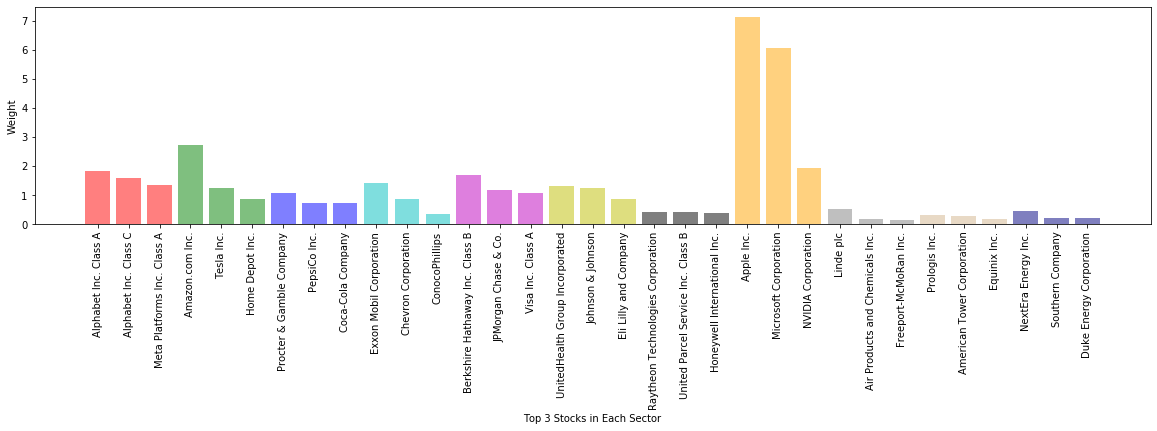

In [23]:
plt.figure(figsize=(20,4))
plt.bar(x_axis, bar_value, color=color_list, alpha=0.5, align="center")
plt.xticks(tick_locations, tick_name)
plt.xticks(rotation=90)

plt.xlabel("Top 3 Stocks in Each Sector")
plt.ylabel("Weight")
plt.show()